# Neural network 


In [17]:
# import all required stuff
import numpy 
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline 

In [22]:
# neural network class

class NeuralNetwork:
    def __init__(self,ILayerNodes, HLayerNodes,OLayerNodes,LearningRate):
        self.ILayerNodes = ILayerNodes
        self.HLayerNodes = HLayerNodes
        self.OLayerNodes = OLayerNodes
        self.lr = LearningRate
        self.wih = numpy.random.normal(0.0, pow(self.HLayerNodes, -0.5),(self.HLayerNodes, self.ILayerNodes)) 
        self.who = numpy.random.normal(0.0,pow(self.OLayerNodes, -0.5), (self.OLayerNodes, self.HLayerNodes))
        self.activation_function = lambda x: scipy.special.expit(x)
    # train neural network
    def train(self, inputs_list, targets_list):
         # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))    
        pass
    
    # Query neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
# calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
# calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
# calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
# calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

        
        

In [12]:
# creating model
iNodes = 3
hNodes = 3
oNodes = 3
lr = 0.5

model = NeuralNetwork(iNodes,hNodes,oNodes,lr)
#model.wih

In [13]:
model.query([1.0,0.5,-1.5])

array([[0.6016978 ],
       [0.40716749],
       [0.54251143]])

In [14]:
data_file = open("mnist_train_100.csv", 'r') 
data_list = data_file.readlines() 
data_file.close()


In [ ]:
all_values = data_list[1].split(',') 
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys',
interpolation='None')

In [23]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [25]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [28]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    print(f"e:{e}")
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
    

e:0
e:1
e:2
e:3
e:4


In [29]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [30]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        
    
    

In [31]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9741


4


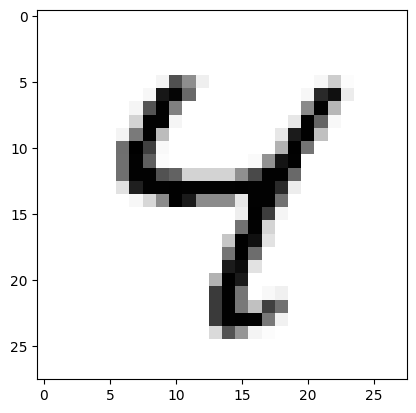

In [41]:
data_file = open("mnist_test_10.csv", 'r') 
data_list = data_file.readlines() 
data_file.close()
all_values = data_list[6].split(',') 
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys',
interpolation='None')
image_data = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
outputs = n.query(image_data)
print(numpy.argmax(outputs))

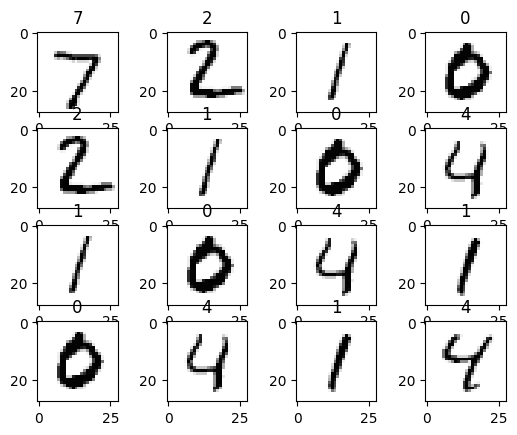

In [54]:
figure, axis = plt.subplots(4, 4)
data_file = open("mnist_test.csv", 'r') 
data_list = data_file.readlines() 
data_file.close()

for x in range (4):
    for y in range(4):
        all_values = data_list[x+y].split(',') 
        image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
        image_data = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
        outputs = n.query(image_data)
        axis[x,y].imshow(image_array, cmap='Greys',
interpolation='None')
        axis[x, y].set_title(numpy.argmax(outputs))